In [2]:
%load_ext nb_black
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
from sklearn.datasets import load_iris, make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.core.display import HTML

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
!dot -Tpng iris_tree.dot -o iris_tree.png

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

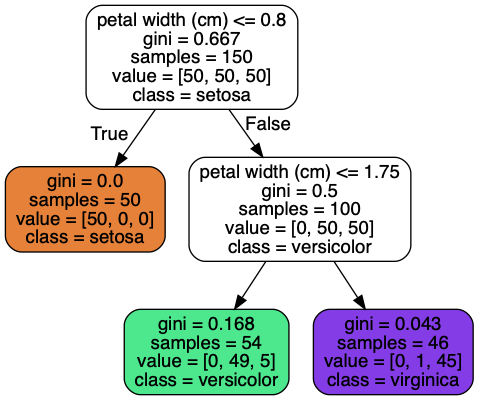

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
Image(filename="iris_tree.png")

In [42]:
# gini - Gini impurity - a measure of how many training examples that
# a leaf applies to belong to 1 class. It is 1 if all training examples that a leaf applies
# belong to 1 class - e.g. the left orange leaf.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
# FIXME - Plot decision tree boundary

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# Decision trees can output prediction probabilities for each class
tree_clf.predict_proba([[2, 1.5]]), tree_clf.predict_proba(
    [[2.46, 1.5]]
), tree_clf.predict_proba([[2.46, 1.8]]), tree_clf.predict_proba([[2.46, 20]])

# What's interesting that 3rd and 4th input output probabilities are the same
# although petal width is much bigger. Actually, estimated probabilities
# will be identical for any feature value combination that lies in the bottom-right quadrant
# Interesting...

(array([[0.        , 0.90740741, 0.09259259]]),
 array([[0.        , 0.90740741, 0.09259259]]),
 array([[0.        , 0.02173913, 0.97826087]]),
 array([[0.        , 0.02173913, 0.97826087]]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
# Let's visualize decision boundaries of our decision tree

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exercises

1. “What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with one million instances?”

There will 1 million decision points (leaves) without any limitations on tree parameters, it will overfit all training samples perfectly. Not sure about exact intuition though, the book did not explain this, it just seems that each training example should have its own decision point if the model is non limited because it's a non-parametric model. A balanced binary tree has the depth of size log2(m), where m is leaf count. Since we have 1KK leaves, the depth is log2(1KK) ~20. 

2. “Is a node’s Gini impurity generally lower or greater than its parent’s? Is it generally lower/greater, or always lower/greater?”

Gini impurity is 0.0 when training instances that satisfy node's condition belong to only one class. Children are more specific than parents (based on parent's condition), so for each child fewer instances should be assigned to them. But it does not say anything about classes themselves, decisions are made on features, not classes. I'd that generally children should have better gini impurity but not always.

??

3. “If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?”

Yes. Limiting the depth of a decision tree acts as a regularizer, hence increasing bias and reducing overfiting.

4. “If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?”

No, not really. Decision trees are not affected by feature scaling, thus scaling input features will not decrease underfitting.

5. “If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?”

**INCORRECT**. Let's see. The complexity of training a decision tree under a CART algo is O(n * mlog2m), where n - samples count, m - leaf count. So, if it takes 1h to train 1 million instances, it would take 10h to train 10 million instances.

6. “If your training set contains 100,000 instances, will setting presort=True speed up training?”

Not really - presort would only speedup training if our dataset size is in thousands. With this size, it will considerably slow down the training.

7. Moons dataset

In [25]:
dataset = make_moons(n_samples=10000, noise=0.4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
dataset

(array([[ 0.28276814,  0.17891558],
        [ 1.91293606,  0.31961123],
        [-0.38066494, -0.2761359 ],
        ...,
        [ 0.60962486,  0.03088417],
        [ 2.42796495, -0.10106089],
        [-0.33398552,  0.38549667]]),
 array([1, 1, 0, ..., 0, 1, 0]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
dataset[0].shape, dataset[1].shape

((10000, 2), (10000,))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], random_state=42)

X_train.shape, X_test.shape

((7500, 2), (2500, 2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={"max_depth": [2, 20, 200, 2000, None], "max_leaf_nodes": [2, 3, 5, 6, None]})
search

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 20, 200, 2000, None],
           

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 20, 200, 2000, None],
           

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
search.cv_results_

{'mean_fit_time': array([0.00365047, 0.00366745, 0.00289564, 0.0028563 , 0.00292096,
        0.00297127, 0.00333142, 0.00408735, 0.00431848, 0.0116055 ,
        0.00279627, 0.0033741 , 0.00418878, 0.0043786 , 0.01215448,
        0.00280128, 0.00345125, 0.00466723, 0.00462246, 0.0120626 ,
        0.00308123, 0.00386515, 0.00443764, 0.00462732, 0.01184926]),
 'std_fit_time': array([1.56886628e-04, 1.57251945e-04, 8.09700385e-05, 7.73094660e-05,
        2.03010619e-04, 2.94466794e-04, 2.08680851e-04, 9.01384440e-05,
        6.73315342e-05, 9.10646010e-04, 1.85045542e-04, 1.70841711e-04,
        1.07683936e-04, 6.38075826e-05, 8.46089507e-04, 1.12110348e-04,
        2.73006393e-04, 4.66750108e-04, 1.77218825e-04, 7.11022220e-04,
        3.49356676e-04, 4.77103674e-04, 1.17866333e-04, 1.22351676e-04,
        3.19885297e-04]),
 'mean_score_time': array([0.00050988, 0.00055199, 0.00040946, 0.00041318, 0.00039825,
        0.00039444, 0.00032001, 0.00032048, 0.00032492, 0.00046625,
        0.00

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
dtree = DecisionTreeClassifier(max_leaf_nodes=5, max_depth=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
y_pred = dtree.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
accuracy_score(y_test, y_pred)

0.862

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

8. “Grow a forest by following these steps:”

In [73]:
from sklearn.model_selection import ShuffleSplit

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [115]:
rs = ShuffleSplit(n_splits=1000, train_size=100, test_size=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
nsplits = rs.get_n_splits(X_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
splits

1000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
trained_trees = []

for train_index, test_index in list(rs.split(X_train))[:5]:
    print(train_index.shape)
    print(test_index.shape)

(100,)
(7400,)
(100,)
(7400,)
(100,)
(7400,)
(100,)
(7400,)
(100,)
(7400,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
X_train.shape

(7500, 2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [124]:
trained_trees = []

for train_index, test_index in rs.split(X_train):
    x_slice = X_train[train_index]
    y_slice = y_train[train_index]
    
    dtree = DecisionTreeClassifier(max_leaf_nodes=5, max_depth=2)
    dtree.fit(x_slice, y_slice)
    
    trained_trees.append(dtree)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [125]:
len(trained_trees)

1000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
scores = [accuracy_score(y_test, tree.predict(X_test)) for tree in trained_trees]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [129]:
import numpy as np

np.mean(scores)

0.82837

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [131]:
# Let's build a forest
# We'll use majority voting

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [135]:
predictions = [tree.predict(X_test) for tree in trained_trees]
predictions[0:10]

[array([1, 0, 0, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 0, 1, 0]),
 array([1, 0, 0, ..., 0, 1, 0]),
 array([1, 0, 0, ..., 0, 1, 0]),
 array([1, 0, 0, ..., 0, 1, 0]),
 array([1, 0, 0, ..., 0, 1, 0]),
 array([1, 0, 0, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 0, 1, 0]),
 array([1, 0, 0, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 0, 0, 0])]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [139]:
from scipy.stats import mode

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [154]:
np.array(predictions).shape

(1000, 2500)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [155]:
y_test_majority_vote = np.apply_along_axis(mode, 0, np.array(predictions))


# [:, 0, :]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [158]:
y_test_majority_vote_reshaped = y_test_majority_vote[0, 0, :]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [152]:
y_test.shape

(2500,)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [159]:
accuracy_score(y_test, y_test_majority_vote_reshaped)

0.8676

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>